# Import Libraries

In [2]:
import pandas as pd
import feature_engine as fe
import matplotlib.pyplot as plt

# Data Loading

In [3]:
df = pd.read_csv("./data/inflation/inflation_in_africa.csv")

In [4]:
df.head()

,Country,Year,Real per Capita GDP Growth Rate (annual %),Real GDP growth (annual %),"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (current US$)",Final consumption expenditure (current US$),General government final consumption expenditure (current US$),Household final consumption expenditure (current US$),Gross capital formation (current US$),...,Imports of goods and services (% of GDP),"Central government, Fiscal Balance (Current US $)","Central government, total revenue and grants (Current US $)","Central government, total expenditure and net lending (Current US $)","Central government, Fiscal Balance (% of GDP)","Central government, total revenue and grants (% of GDP)","Central government, total expenditure and net lending (% of GDP)","Current account balance (Net, BoP, cur. US$)",Current account balance (As % of GDP),"Inflation, consumer prices (annual %)"
0,Malawi,1980,NaN,NaN,3038.14,2236.36,1104.30,238.76,865.54,306.24,...,21.48,-142.96,298.61,441.57,-6.39,13.35,19.75,-207.07,-9.26,NaN
1,Malawi,1981,-13.06,-10.81,2709.74,2236.40,1091.26,221.16,870.10,218.14,...,17.41,-133.47,276.61,410.09,-5.97,12.37,18.34,-86.71,-3.88,12.01
2,Malawi,1982,-0.93,1.44,2748.84,2113.68,1002.45,206.82,795.63,252.58,...,16.10,-119.21,254.71,373.92,-5.64,12.05,17.69,-91.15,-4.31,9.52
3,Malawi,1983,1.56,4.21,2864.70,2203.66,1037.06,200.81,836.26,278.87,...,15.73,-96.80,250.68,347.48,-4.39,11.38,15.77,-103.94,-4.72,13.77
4,Malawi,1984,0.54,3.92,2976.95,2157.88,1028.95,189.62,839.34,155.58,...,14.79,-78.94,239.30,318.24,-3.66,11.09,14.75,3.88,0.18,19.74


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2322 entries, 0 to 2321
Data columns (total 31 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Country                                                                2322 non-null   object 
 1   Year                                                                   2322 non-null   int64  
 2   Real per Capita GDP Growth Rate (annual %)                             2238 non-null   float64
 3   Real GDP growth (annual %)                                             2238 non-null   float64
 4   Gross domestic product, (constant prices US$)                          2292 non-null   float64
 5   Gross domestic product, current prices (current US$)                   2311 non-null   float64
 6   Final consumption expenditure  (current US$)                           2239 non-null   f

- There are some missing values in the dataset. We will fill them with the mean for each country.

In [6]:
df.groupby("Country").count().head()

,Year,Real per Capita GDP Growth Rate (annual %),Real GDP growth (annual %),"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (current US$)",Final consumption expenditure (current US$),General government final consumption expenditure (current US$),Household final consumption expenditure (current US$),Gross capital formation (current US$),"Gross capital formation, Private sector (current US$)",...,Imports of goods and services (% of GDP),"Central government, Fiscal Balance (Current US $)","Central government, total revenue and grants (Current US $)","Central government, total expenditure and net lending (Current US $)","Central government, Fiscal Balance (% of GDP)","Central government, total revenue and grants (% of GDP)","Central government, total expenditure and net lending (% of GDP)","Current account balance (Net, BoP, cur. US$)",Current account balance (As % of GDP),"Inflation, consumer prices (annual %)"
Country,,,,,,,,,,,,,,,,,,,,,
Algeria,43,42,42,43,43,43,43,43,43,33,...,43,43,43,43,43,43,43,43,43,42
Angola,43,42,42,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,23
Benin,43,42,42,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,42
Botswana,43,42,42,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,42
Burkina Faso,43,42,42,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,42


Notes:

- The dataset contains multiple datasets for each Country, as It is not possible to predict the inflation rate for all of the countries at once
- For each country there are 43 data points, which is not enough to train a model


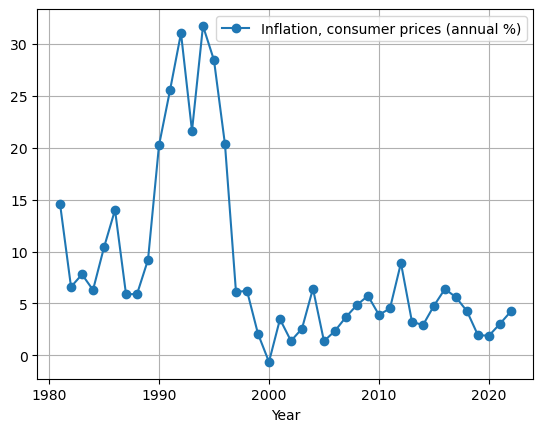

In [7]:
df[df.Country == "Algeria"].plot(
    x="Year", y="Inflation, consumer prices (annual %)", kind="line", marker="o"
)

plt.grid()
plt.show()

In [8]:
# Fill missing values with the mean of column grouped by country
df = df.groupby("Country").apply(lambda x: x.fillna(x.mean()))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2322 entries, ('Algeria', 43) to ('eSwatini', 859)
Data columns (total 30 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Year                                                                   2322 non-null   int64  
 1   Real per Capita GDP Growth Rate (annual %)                             2322 non-null   float64
 2   Real GDP growth (annual %)                                             2322 non-null   float64
 3   Gross domestic product, (constant prices US$)                          2322 non-null   float64
 4   Gross domestic product, current prices (current US$)                   2322 non-null   float64
 5   Final consumption expenditure  (current US$)                           2322 non-null   float64
 6   General government final consumption expenditure (current US$

In [10]:
# Sort the dataframe by Country and Year
df.sort_values(by=["Country", "Year"], ascending=[True, True], inplace=True)

In [11]:
df.head()

Year  Real per Capita GDP Growth Rate (annual %)  \
Country                                                        
Algeria 43  1980                                    0.556531   
        44  1981                                   -0.130000   
        45  1982                                    3.130000   
        46  1983                                    2.160000   
        47  1984                                    2.390000   

            Real GDP growth (annual %)  \
Country                                  
Algeria 43                     2.62893   
        44                     3.00000   
        45                     6.40000   
        46                     5.40000   
        47                     5.60000   

            Gross domestic product, (constant prices US$)  \
Country                                                     
Algeria 43                                       69983.12   
        44                                       72082.61   
        45                                       76695.90   
        46                                       80837.48   
        47                                       85364.38   

            Gross domestic product, current prices (current US$)  \
Country                                                            
Algeria 43                                           42252.20      
        44                                           44264.57      
        45                                           45094.84      
        46                                           48702.20      
        47                                           52827.90      

            Final consumption expenditure  (current US$)  \
Country                                                    
Algeria 43                                      24112.63   
        44                                      26305.61   
        45                                      27485.58   
        46                                      29417.60   
        47                                      33149.25   

            General government final consumption expenditure (current US$)  \
Country                                                                      
Algeria 43                                            5824.44                
        44                                            6106.39                
        45                                            6676.55                
        46                                            7244.61                
        47                                            7899.47                

            Household final consumption expenditure (current US$)  \
Country                                                             
Algeria 43                                           18288.19       
        44                                           20199.22       
        45                                           20809.03       
        46                                           22172.99       
        47                                           25249.78       

            Gross capital formation (current US$)  \
Country                                             
Algeria 43                               16550.57   
        44                               16413.14   
        45                               16842.29   
        46                               18338.41   
        47                               18567.96   

            Gross capital formation, Private sector  (current US$)  ...  \
Country                                                             ...   
Algeria 43                                       26115.555948       ...   
        44                                       26115.555948       ...   
        45                                       26115.555948       ...   
        46                                       26115.555948       ...   
        47                                       26115.555948       ...   

            I

- Calculating the mean for each country inflation rate each year and make a new dataset for Africa

In [14]:
africa_df = df.groupby("Year").mean()

In [15]:
africa_df.head()

,Real per Capita GDP Growth Rate (annual %),Real GDP growth (annual %),"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (current US$)",Final consumption expenditure (current US$),General government final consumption expenditure (current US$),Household final consumption expenditure (current US$),Gross capital formation (current US$),"Gross capital formation, Private sector (current US$)","Gross capital formation, Public sector (current US$)",...,Imports of goods and services (% of GDP),"Central government, Fiscal Balance (Current US $)","Central government, total revenue and grants (Current US $)","Central government, total expenditure and net lending (Current US $)","Central government, Fiscal Balance (% of GDP)","Central government, total revenue and grants (% of GDP)","Central government, total expenditure and net lending (% of GDP)","Current account balance (Net, BoP, cur. US$)",Current account balance (As % of GDP),"Inflation, consumer prices (annual %)"
Year,,,,,,,,,,,,,,,,,,,,,
1980,0.971532,3.481958,13600.737325,10415.857407,5500.209700,1159.187997,4341.023179,1846.959092,1620.237774,1056.797145,...,36.167058,-281.629445,2004.025804,2266.199297,-5.651655,21.493650,26.743294,50.018376,-7.163063,13.037703
1981,-0.823321,2.054507,13744.409177,9891.282407,5863.216552,1239.321330,4623.896142,1973.862981,1662.408118,987.463475,...,37.646317,-490.911667,1975.049508,2446.505408,-6.331100,21.026243,26.955887,-329.303846,-7.639730,18.850817
1982,-0.179432,2.695989,14005.087510,9709.049444,5777.038774,1224.212441,4552.826883,1752.806685,1528.729229,893.654771,...,37.131317,-634.604260,1927.186545,2542.335408,-7.022581,22.110131,28.731072,-324.617735,-8.777878,15.254397
1983,-2.354617,0.458581,14052.476584,9884.352963,5491.232478,1205.945960,4285.286327,1646.330389,1413.759970,883.438104,...,34.617984,-542.346297,1849.040184,2389.676890,-5.822952,21.503899,27.217183,-160.231068,-5.734730,17.481248
1984,-0.871840,1.970618,14500.541769,9642.634259,5335.803034,1149.978923,4185.822994,1572.464463,1408.189229,818.120512,...,34.655762,-500.135371,1824.868147,2323.293001,-5.108322,21.344269,26.342183,-113.255513,-5.128804,17.460508


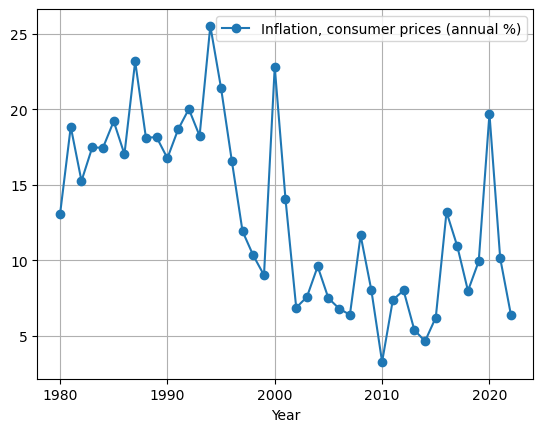

In [18]:
# Plot the inflation rate in Africa
africa_df.plot(kind="line", marker="o", y="Inflation, consumer prices (annual %)")

plt.grid()
plt.show()